## Safety and Efficacy of the BNT162b2 mRNA Covid-19 Vaccine

<https://www.nejm.org/doi/full/10.1056/NEJMoa2034577>

<img src="https://www.nejm.org/na101/home/literatum/publisher/mms/journals/content/nejm/2020/nejm_2020.383.issue-27/nejmoa2034577/20210201/images/img_xlarge/nejmoa2034577_f4.jpeg">

<img src="../imgs/rct-table2.png">

__Vaccine efficacy__ was estimated by $100\times(1−\textrm{IRR})$, 

$$\textrm{Vaccine Efficacy} = 100 \cdot (1 - \textrm{IRR})$$

where IRR is the calculated ratio of confirmed cases of Covid-19 illness per 1000 person-years of follow-up in the active vaccine group to the corresponding illness rate in the placebo group.

$$\textrm{IRR} = \frac{\textrm{Vaccine Incidence Rate}}{\textrm{Placebo Incidence Rate}}$$

In [131]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

cases_vaccine, size_vaccine, cases_placebo, size_placebo = 8, 17411, 162, 17511
cases_vaccine/size_vaccine, cases_placebo/size_placebo

(0.00045947963930848316, 0.009251327736851122)

$$\textrm{Vaccine Incidence Rate} = \frac{8}{17411} = 0.000459$$

$$\textrm{Placebo Incidence Rate} = \frac{162}{17511} = 0.00925$$

In [133]:
100 * (1-(cases_vaccine/size_vaccine)/(cases_placebo/size_placebo))

95.03336545436368

$$\pi_v = \textrm{Vaccine Incidence Rate}$$

$$\pi_c = \textrm{Placebo Incidence Rate}$$

$$\textrm{Vaccine Efficacy} = 100 \cdot \Bigg(1 - \frac{\frac{8}{17411}}{\frac{162}{17511}}\Bigg) = 95.0$$

$$(\textrm{Posterior beliefs}) \propto (\textrm{Prior beliefs}) \cdot (\textrm{Likelihood of observed data})$$

In [134]:
thetas = stats.beta.rvs(0.700102 + 8, 1 + 162 + 8, size=1000000) 
#ves = (1-2*thetas)/(1-thetas)
#np.percentile(ves, 2.5), np.percentile(ves, 97.5)

In [135]:
theta_mean = np.mean(thetas)
theta_mean
#theta_mean = (0.700102 + 8)/(1 + 162)

0.048399438728483735

In [53]:
(1-2*theta_mean)/(1-theta_mean)

0.9490907714717061

In [31]:
1 - (theta_mean/(1-theta_mean))

0.9466354024758556

In [55]:
theta_1 = np.percentile(thetas, 2.5)
(1-2*theta_1)/(1-theta_1)

0.9773357990686233

In [71]:
a1 = 8 
a2 = 4
q1 = 2/3
q2 = 1/3

In [74]:
(a1/q1)/2, (a2/q2)/2

(6.0, 6.0)

In [86]:
q1 = 17411/(17411 + 17511)
q2 = 17511/(17411 + 17511)

a1 = 8
a2 = 162
b1 = a1/(2*q1)
b2 = a2/(2*q2)
b1, b2

(8.022973981965425, 161.53743361315742)

In [91]:
thetas = stats.beta.rvs(0.700102 + a1, 1 + a2 , size=1000000)
ves = (1-2*thetas)/(1-thetas)
np.percentile(ves, 2.5), np.percentile(ves, 97.5)

(0.9037945945833996, 0.9762350872821473)

In [61]:
theta_mean = np.mean(theta)

In [63]:
(1-2*theta_mean)/(1-theta_mean)

0.949113576357418

In [ ]:
samples = 1 - samples_vaccine/samples_placebo
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

## Participants without evidence of infection

In [129]:
sr1 = 2.214
sr2 = 2.222

18198 *2 * sr1/(sr1 + sr2)

18165.181244364292

In [105]:
samples = stats.beta.rvs(0.5, 0.5, size=10000000)
np.mean(samples), np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.5000428198808858, 0.0015480816328275872, 0.9984552595467301)

In [102]:
x = 0.5* (1 - 0.3)
x

0.35

a/(1+a) = x
(1 + a -1)/(1+a) = x
1 - 1/(1+a) = x
1/(1+a) = 1 - x
1+a = 1/(1-x)
a = 1/(1-x) - 1= (1 - 1 + x)/(1-x) = x/(1-x)

In [114]:
a = 1/(1 - .35) - 1
a

0.5384615384615383

In [119]:
p = a/(a+1)
p

0.3499999999999999

In [120]:
1 - (p/0.5)

0.30000000000000016

In [123]:
samples_vaccine = stats.beta.rvs(0.02 + 8, 1 + 17411 - 8, size=100000)
samples_placebo = stats.beta.rvs(1 + 162, 1 + 17511 - 162, size=100000)

samples = 1 - samples_vaccine/samples_placebo
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.9083023918081317, 0.9785803597095938)

In [96]:
samples_vaccine = stats.beta.rvs(0.5 + 8, 1 + 17411 - 8, size=100000)
samples_placebo = stats.beta.rvs(1 + 162, 1 + 17511 - 162, size=100000)

samples = 1 - samples_vaccine/samples_placebo
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.9041338055345283, 0.9768944567417971)

In [62]:
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.05, roundto=4)
hpd_mu

[(0.9037, 0.9765)]

In [59]:
samples_vaccine = stats.beta.rvs(0.700102 + 9, 1 + 18559 - 9, size=100000)
samples_placebo = stats.beta.rvs(0.700102 + 169, 1 + 18708 - 169, size=100000)

samples = 1 - samples_vaccine/samples_placebo
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.898786082726379, 0.9729908780738307)

In [57]:
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.05, roundto=4)
hpd_mu

[(0.9072, 0.9794)]

In [49]:
a = 0.700102 + cases_treatment
b = 1 + size_treatment - cases_treatment
samples_treatment = stats.beta.rvs(0.700102 + 8, 1 + 17511, size=100000)

In [51]:
samples = 1 - samples_treatment/samples_control
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.05, roundto=4)
hpd_mu

[(0.9089, 0.9797)]

In [52]:
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.9040089087947439, 0.9764364829356902)

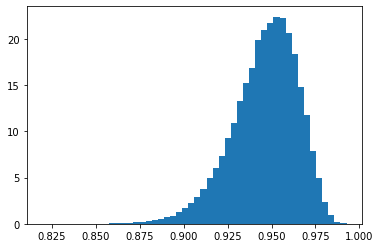

In [9]:
plt.hist(samples, density=True, bins=50)
plt.show()

In [10]:
coef_control = 1000 * cases_control/size_control
coef_treatment = 1000 * cases_treatment/size_treatment
coef_control, coef_treatment
1 - coef_treatment/coef_control

0.9508992936362399

* <https://sph.unc.edu/wp-content/uploads/sites/112/2015/07/nciph_ERIC4.pdf>

## Row two

In [9]:
cases_treatment, size_treatment, cases_control, size_control = 9, 18708, 169, 18559

successes_control = size_control - cases_control
successes_treatment = size_treatment - cases_treatment

1-(cases_treatment/size_control)/(cases_control/size_treatment)

0.9463180115486481

In [10]:
a = 0.700102 + cases_control
b = 1 + size_control
samples_control = stats.beta.rvs(a, b, size=100000)
a = 0.700102 + cases_treatment
b = 1 + size_treatment
samples_treatment = stats.beta.rvs(a, b, size=100000)

In [11]:
samples = 1 - samples_treatment/samples_control
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.06, roundto=4)
hpd_mu

[(0.9062, 0.9758)]

In [12]:
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.8990384002144081, 0.9732483098844845)

## Subgroup analysis

It uses __Clopper–Pearson interval__

<https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval>

<img src="../imgs/rct-table3.png">

In [27]:
cases_treatment, size_treatment, cases_control, size_control = 5, 9897, 114, 9955

1-(cases_treatment/size_control)/(cases_control/size_treatment)

0.9563958867535489

In [32]:
a = 0.700102 + cases_control
b = 1 + size_control
samples_control = stats.beta.rvs(a, b, size=100000)
a = 0.700102 + cases_treatment
b = 1 + size_treatment
samples_treatment = stats.beta.rvs(a, b, size=100000)

samples = 1 - samples_treatment/samples_control

np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.8976378605646331, 0.9822013239447627)

In [35]:
samples = 1 - stats.beta.rvs(cases_treatment, cases_control + 1, size=100000)
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.9166742539775998, 0.9861670804860104)

In [36]:
samples = 1 - stats.beta.rvs(cases_treatment + 1, cases_control, size=100000)
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.9045008296688809, 0.9814486432862337)

In [13]:

17411 / 2214 , 17511/2222


(7.864046973803071, 7.880738073807381)